# Visualising the Gender Gap in College Degrees
### Background
Many studies have unanimously shown that a gender diverse working environment leads to increased throughput and increased productivity in the work. Not only this, gender diversity is an acceptable parameter to gauge the development of any society. A big chunk of the gender diversity factor in industries is dependent on the gender diversity factor in the different kinds of degrees offered universities. For instance - a big reason for such low level of gender diversity in engineering jobs can be attributed to low level of gender diversity in the university stage itself.

*The Department of Education Statistics* (USA) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. I have provided the link for the same below -
http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv

Here's a preview of the first few rows - 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees[:10]

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3
5,1975,18.333162,19.134048,60.9,34.449902,19.686249,41.5,19.8,72.801854,3.2,61.647206,75.0,78.9,40.7,19.1,54.5,63.0,37.7
6,1976,22.252760,21.394491,61.3,36.072871,23.430038,44.3,23.9,72.166525,4.5,62.148194,74.4,79.2,41.5,20.0,56.9,65.6,39.2
7,1977,24.640177,23.740541,62.0,38.331386,27.163427,46.9,25.7,72.456395,6.8,62.723067,74.3,80.5,41.1,21.3,59.0,69.3,40.5
8,1978,27.146192,25.849240,62.5,40.112496,30.527519,49.9,28.1,73.192821,8.4,63.619122,74.3,81.9,41.6,22.5,61.3,71.5,41.8
9,1979,29.633365,27.770477,63.2,42.065551,33.621634,52.3,30.2,73.821142,9.4,65.088390,74.2,82.3,42.3,23.7,63.3,73.3,43.6


## Introduction
In this project, using `matplotlib`, I will visualise the gender gap across college degrees for all 17 categories of degrees mentioned in the database above. The objective of the project is NOT to arrive at the exact figures, but to be able to **visually compare the gender gaps across various degrees**.

Let's cut to the chase and plot the *STEM* (Science, Technology, Engineering, Mathematics) degrees from our dataset -

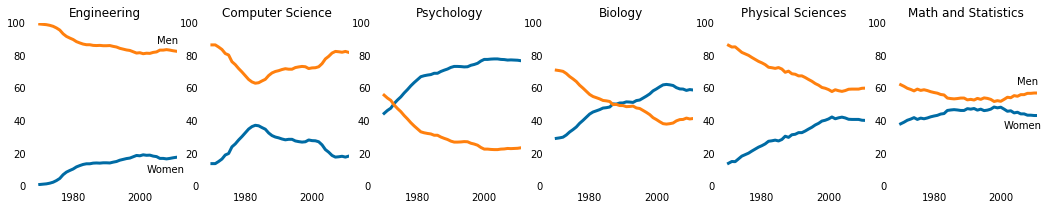

In [2]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

The initial visualisation looks good, and immediately we can figure out the following -
1. Very high  gender gap across `Engineering`,`Psychology` and `Computer Science` degrees
2. Low gender gap across `Biology`,`Physical Sciences`, and `Math and Statistics`

Wasting no time, I plot the line graphs for all the 17 Degrees below -

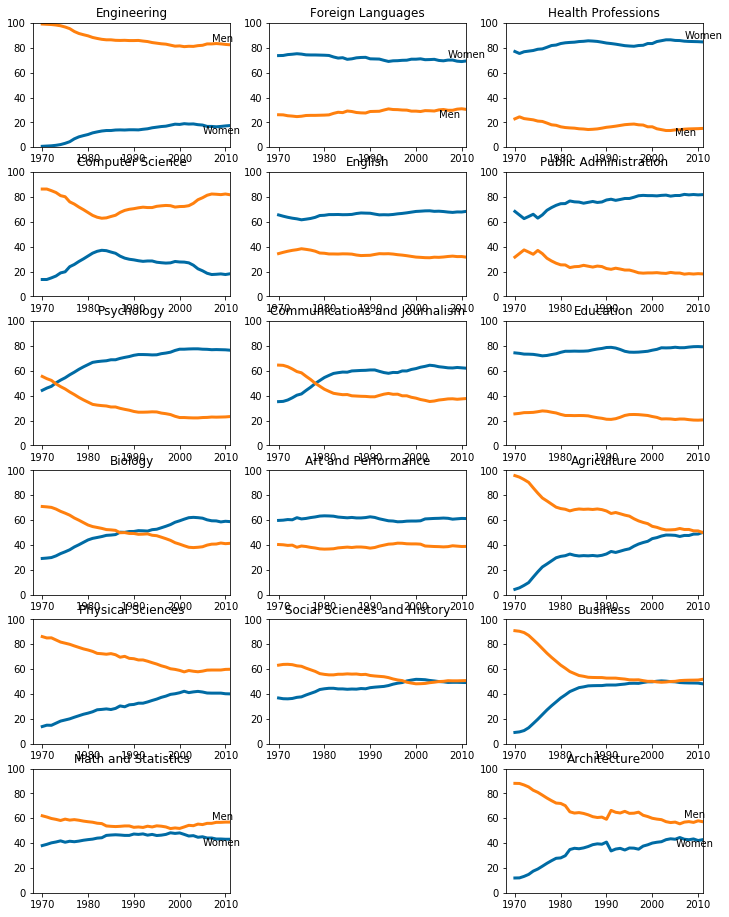

In [7]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig = plt.figure(figsize = (12,16))

# STEM plots
for i in range(6):
    ax = fig.add_subplot(6,3,i*3+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[i]], linewidth = 3, c=cb_dark_blue)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[i]], linewidth = 3, c=cb_orange)
    ax.set_title(stem_cats[i])
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    if i == 0:
        ax.text(2007,85,'Men')
        ax.text(2005,11,'Women')
    if i == 5:
        ax.text(2007,59,'Men')
        ax.text(2005,38,'Women')
    
# LIB_ARTS plots
for i in range(5):
    ax = fig.add_subplot(6,3,i*3+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[i]], linewidth = 3, c=cb_dark_blue)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[i]], linewidth = 3, c=cb_orange)
    ax.set_title(lib_arts_cats[i])
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    if i == 0:
        ax.text(2007,72,'Women')
        ax.text(2005,24,'Men')

# OTHER plots
for i in range(6):
    ax = fig.add_subplot(6,3,i*3+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[i]], linewidth = 3, c=cb_dark_blue)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[i]], linewidth = 3, c=cb_orange)
    ax.set_title(other_cats[i])
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    if i == 0:
        ax.text(2007,87,'Women')
        ax.text(2005,9,'Men')
    if i == 5:
        ax.text(2007,60,'Men')
        ax.text(2005,37,'Women')

Although data visualised by the plots look good, We have too much `INK` on our plots. In order to improve the `data-ink ratio`, I shall **optimise the aesthetics** of the plots by -
1. Removing X and Y Ticks
2. Removing Spines
3. Remove Bottom Labels from each plot (leaving them only on the bottom-most plot in each column)
4. Adding a Horizontal Line right in between each of the plots (to better understand the divide between the gender-lines)

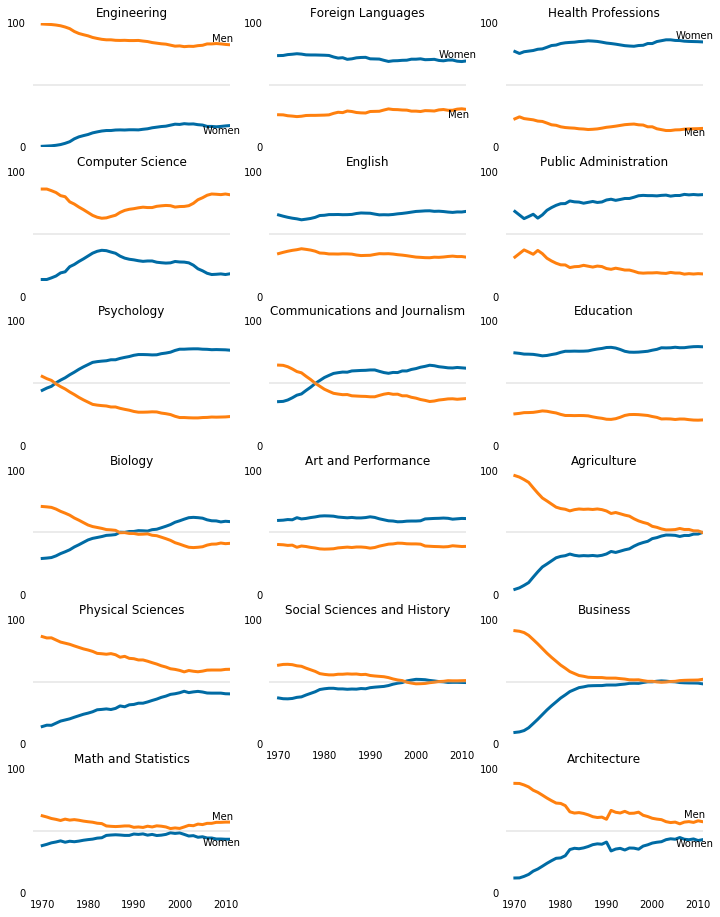

In [5]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig = plt.figure(figsize = (12,16))

# STEM plots
for i in range(6):
    ax = fig.add_subplot(6,3,i*3+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[i]], linewidth = 3, c=cb_dark_blue)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[i]], linewidth = 3, c=cb_orange)
    ax.set_title(stem_cats[i])
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(top=False,bottom=False,left=False,right=False,labelbottom = False)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)

    if i == 0:
        ax.text(2007,85,'Men')
        ax.text(2005,11,'Women')
    if i == 5:
        ax.text(2007,59,'Men')
        ax.text(2005,38,'Women')
ax.tick_params(labelbottom = True)

# LIB_ARTS plots
for i in range(5):
    ax = fig.add_subplot(6,3,i*3+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[i]], linewidth = 3, c=cb_dark_blue)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[i]], linewidth = 3, c=cb_orange)
    ax.set_title(lib_arts_cats[i])
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(top=False,bottom=False,left=False,right=False,labelbottom = False)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)

    if i == 0:
        ax.text(2005,72,'Women')
        ax.text(2007,24,'Men')
ax.tick_params(labelbottom = True)

# OTHER plots
for i in range(6):
    ax = fig.add_subplot(6,3,i*3+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[i]], linewidth = 3, c=cb_dark_blue)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[i]], linewidth = 3, c=cb_orange)
    ax.set_title(other_cats[i])
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(top=False,bottom=False,left=False,right=False,labelbottom = False)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)

    if i == 0:
        ax.text(2005,87,'Women')
        ax.text(2007,9,'Men')
    if i == 5:
        ax.text(2007,60,'Men')
        ax.text(2005,37,'Women')
ax.tick_params(labelbottom = True)

plt.savefig('Job Categories.png')

## Conclusion
Well, that is it folks. The aim was this (mini) project was to be able to quickly analyse a given set of data by doing a comparitive visual analysis of the given descriptive statistics. I am able to figure out that 
* `Engineering` Degree lives up to its name as being one of the most male-dominated degrees all throughout!
* `Health Professions` see a big gender divide - primarily dominated by women.
* `The Liberal Arts` branch of degrees (the middle column) is dominated all the way by women.
* Degrees such as `Architecture`, `Agriculture`,`Business`, and `Physical Sciences` have seen a narrowing gender gap over the years, which is good development.
* Degrees such as `Psychology`,`Computer Science` and `Education` are seeing a widening gender gap, which is a cause of worry.

*-Author - Raghav_A*